In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

data, labels = load_wine(return_X_y=True)

import matplotlib.pyplot as plt
from scipy import interpolate as intp

def draw_plot_and_scatter(x, y, plot_name='plot_name'):
    f1 = intp.interp1d(x, y, kind = 'linear')
    x_smooth = np.linspace(x.min(), x.max(), 3000)
    y_smooth = f1(x_smooth)   
    # 绘制曲线图
    ax.plot(x_smooth, y_smooth, label=plot_name, zorder=1)
    # 绘制散点图
    ax.scatter(x, y, marker='+', zorder=2)


C:\Users\22102\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


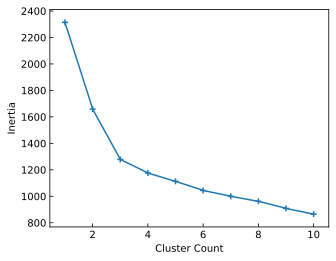

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def calculate_Inertia(data, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    result = estimator[-1].inertia_
    return result

n_list, Inertia = [], []
for n_clusters in range(1, 11):
    n_list.append(n_clusters)
    Inertia.append(calculate_Inertia(data, n_clusters))
    
n_list = np.array(n_list)
Inertia = np.array(Inertia)
    
%config InlineBackend.figure_format = 'svg'
f, ax = plt.subplots(1)
plt.xlabel(r'Cluster Count')
plt.ylabel(r'Inertia')
#将x轴的刻度线方向设置向内
plt.rcParams['xtick.direction'] = 'in'
#将y轴的刻度方向设置向内
plt.rcParams['ytick.direction'] = 'in'
draw_plot_and_scatter(n_list, Inertia)
#设置图的大小
f.set_size_inches(5,4)
#设置分辨率并保存
plt.savefig('elbow_method.jpg',dpi=1000, bbox_inches='tight')
plt.show(f)


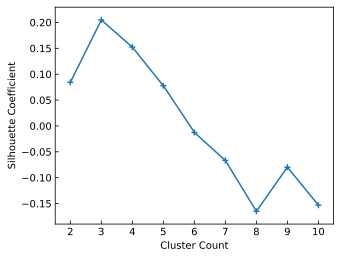

In [7]:
from sklearn import metrics

def calculate_silhouette(data, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    result = metrics.silhouette_score(data, estimator[-1].labels_, metric="euclidean", sample_size=300)
    return result

n_list, Silhouette = [], []
for n_clusters in range(2, 11):
    n_list.append(n_clusters)
    Silhouette.append(calculate_silhouette(data, n_clusters))
    
n_list = np.array(n_list)
Silhouette = np.array(Silhouette)
    
%config InlineBackend.figure_format = 'svg'
f, ax = plt.subplots(1)
plt.xlabel(r'Cluster Count')
plt.ylabel(r'Silhouette Coefficient')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
draw_plot_and_scatter(n_list, Silhouette)
f.set_size_inches(5,4)
plt.savefig('Silhouette.jpg',dpi=1000, bbox_inches='tight')
plt.show(f)


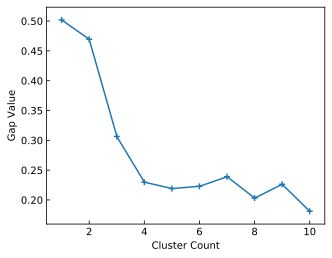

In [8]:
from gap_statistic import OptimalK

optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')

def gap_stat(data, value='gap_value'):
    n_clusters = optimalK(data, cluster_array=np.arange(1, 11))
    optimalK.gap_df.head()
    return optimalK.gap_df.n_clusters, optimalK.gap_df.eval(value)

n_array, gap_array = gap_stat(data)
for k in range(99):
    gap_array = [i + j for i, j in zip(gap_array, gap_stat(data)[1])]
gap_array = [0.01*i for i in gap_array]
    
    
%config InlineBackend.figure_format = 'svg'
f, ax = plt.subplots(1)
plt.xlabel(r'Cluster Count')
plt.ylabel(r'Gap Value')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
draw_plot_and_scatter(n_array, gap_array)
f.set_size_inches(5,4)
plt.savefig('gap_statistic.jpg',dpi=1000, bbox_inches='tight')
plt.show(f)

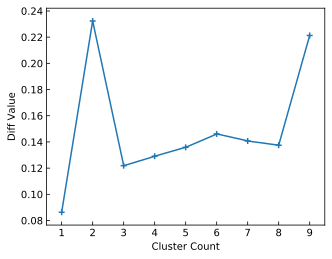

In [9]:
n_array, diff_array = gap_stat(data, value='diff')

for k in range(99):
    diff_array = [i + j for i, j in zip(diff_array, gap_stat(data, value='diff')[1])]
diff_array = [0.01*i for i in diff_array]
    
%config InlineBackend.figure_format = 'svg'
f, ax = plt.subplots(1)
plt.xlabel(r'Cluster Count')
plt.ylabel(r'Diff Value')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
draw_plot_and_scatter(n_array, diff_array)
f.set_size_inches(5,4)
plt.savefig('diff_statistic.jpg',dpi=1000, bbox_inches='tight')
plt.show(f)